In [2]:
%matplotlib inline

import os
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.analysis.fitter import Fitter
from onix.helpers import data_identifier, console_bold, present_float

In [3]:
name = "Hole Burning Temporal"
analysis_number = None
identifier = None

In [4]:
def add_label(ax, x=0.02, y=1.1):
    ax.text(x, y, identifier, transform=ax.transAxes)

In [181]:
data_numbers = [497]
data, headers = get_experiment_data(data_numbers[0])
identifier = "data " + data_identifier(data_numbers) + ", analysis " + data_identifier([analysis_number])
headers

{'params': {'excitation_aom_frequency': 78 <Unit('megahertz')>,
  'excitation_aom_amplitude': 2400,
  'excitation_time': 10 <Unit('millisecond')>,
  'probe_aom_amplitude': 2400,
  'probe_aom_frequency': 78 <Unit('megahertz')>,
  'probe_time': 2 <Unit('microsecond')>,
  'probe_delay_step_size': 2 <Unit('microsecond')>,
  'probe_delay_steps': array([0, 1, 2, 3]),
  'repeats': 200,
  'sampling_rate': 10000000.0},
 'data_info': {'name': 'Hole burning temporal',
  'data_number': 497,
  'save_time': '2023-10-03 12:30:54',
  'save_epoch_time': 1696350654.865723}}

In [182]:
# if input(f"Create new analysis folder? (y/{console_bold('n')}) ") == "y":
#     analysis_number = open_analysis_folder(name)
# else:
#     if input(f"Keep current analysis number of {analysis_number}? ({console_bold('y')}/n) ") == "n":
#         analysis_number = int(input("Enter analysis number: "))
# identifier = "data " + data_identifier(data_numbers) + ", analysis " + data_identifier([analysis_number])
# print(f"Current analysis number is {analysis_number}")

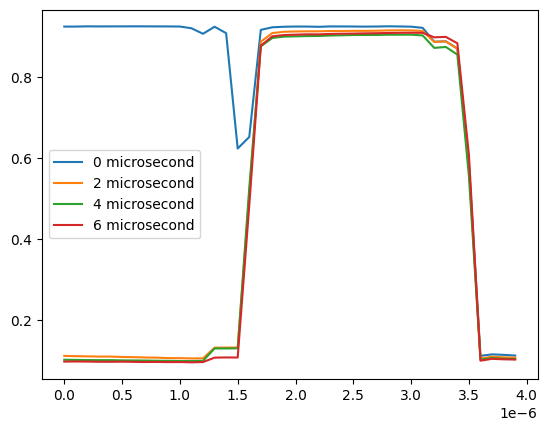

In [183]:
fig, ax = plt.subplots()
#ax.plot(data["times"], np.average(data["pre_excite_transmissions"][3], axis=0))
for kk in range(len(data["post_excite_transmissions"])):
    ax.plot(data["times"], np.average(data["post_excite_transmissions"][kk], axis=0), label=str(kk * headers["params"]["probe_delay_step_size"]))
#ax.set_ylim(-0.005, 0.03)
ax.legend()
plt.show()

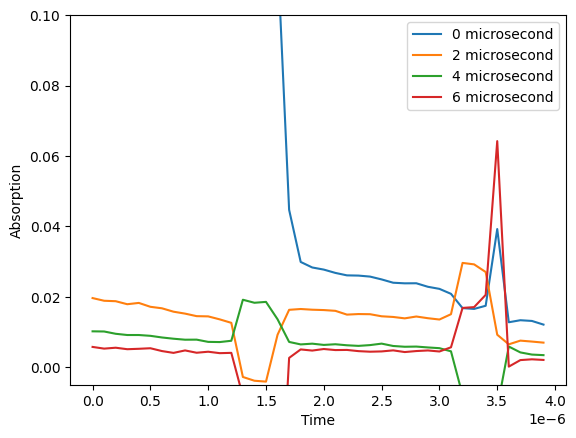

In [177]:
fig, ax = plt.subplots()
#ax.plot(data["times"], np.average(data["pre_excite_transmissions"][3], axis=0))
for kk in range(len(data["post_excite_transmissions"])):
    ax.plot(data["times"], np.average(data["post_excite_transmissions"][kk], axis=0) - np.average(data["pre_excite_transmissions"][kk], axis=0), label=str(kk * headers["params"]["probe_delay_step_size"]))
ax.set_ylim(-0.005, 0.1)
ax.set_xlabel("Time")
ax.set_ylabel("Absorption")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


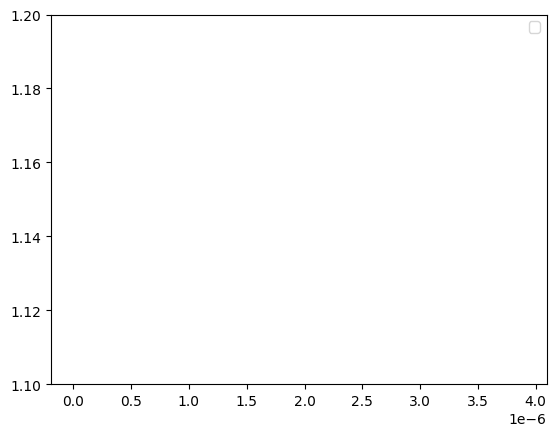

In [152]:
fig, ax = plt.subplots()
for kk in range(len(data["post_excite_transmissions"][3])):
    ax.plot(data["times"], data["post_excite_transmissions"][3][kk])
ax.set_ylim(1.1, 1.2)
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


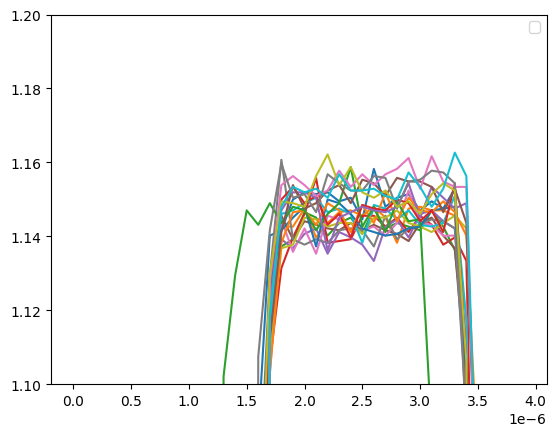

In [70]:
fig, ax = plt.subplots()
for kk in range(len(data["pre_excite_transmissions"][1])):
    ax.plot(data["times"], data["pre_excite_transmissions"][1][kk])
ax.set_ylim(1.1, 1.2)
ax.legend()
plt.show()